In [2]:
import time
import gym
import numpy as np
from gym import spaces
from tqdm import tqdm

import numpy as np
from utils.skeleton import *
from utils.quaternion import *
from utils.blazepose import blazepose_skeletons
import os
from pypot.creatures import PoppyTorso
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
#from pypot.creatures.ik import IKChain
from pypot.primitive.move import Move
from pypot.primitive.move import MovePlayer

import sys
sys.path.append('./gym-examples')
import gym_examples
from gym.wrappers import FlattenObservation

from stable_baselines3 import SAC

In [3]:
env = gym.make('gym_examples/Poppy-v0') 

c:\Users\Moez\anaconda3\envs\Robotics\lib\site-packages\ikpy\chain.py:60: UserWarning: Link last_joint (index: 8) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive
  warnings.warn("Link {} (index: {}) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive".format(link.name, link_index))


len idx : 12, len skeletons: 279, idx [  0  25  50  75 100 125 150 175 200 225 250 275]]


Check your CoppeliaSim, there is now a Poppy Torso on a table. 

Remove that table !

Simply click on it and press the delete key.

In [4]:
env.reset()

c:\Users\Moez\anaconda3\envs\Robotics\lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
c:\Users\Moez\anaconda3\envs\Robotics\lib\site-packages\gym\utils\passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
c:\Users\Moez\anaconda3\envs\Robotics\lib\site-packages\gym\utils\passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(


array([ 0.15440764, -0.2197069 , -0.00233007, -0.09889662, -0.24178904,
        0.01207023], dtype=float32)

In [5]:
! pip install shimmy

In [6]:
model = SAC('MlpPolicy', env, verbose=1, batch_size=57) # tried gamma 10, 5, 2 : too much
# I also try 1.001, before with 0.999 it did a lot of back and forth with the arm
# with 1.001, we hope that it really anticipates future rewards, by not alternating too much between going up and down
model.learn(total_timesteps=57*15) # 57*15 = 855 steps = 15 seconds of simulation
model.save("sac_imitation")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\Moez\anaconda3\envs\Robotics\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
c:\Users\Moez\anaconda3\envs\Robotics\lib\site-packages\gym\utils\passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
c:\Users\Moez\anaconda3\envs\Robotics\lib\site-packages\gym\utils\passive_env_checker.py:225: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19       |
|    ep_rew_mean     | 1.99     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 2        |
|    time_elapsed    | 27       |
|    total_timesteps | 76       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19       |
|    ep_rew_mean     | 1.92     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 2        |
|    time_elapsed    | 57       |
|    total_timesteps | 152      |
| train/             |          |
|    actor_loss      | -2.92    |
|    critic_loss     | 0.125    |
|    ent_coef        | 0.985    |
|    ent_coef_loss   | -0.0508  |
|    learning_rate   | 0.0003   |
|    n_updates       | 51       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_me

The below is just some other tials, you can ignore it.

In [7]:
env.reset()

array([ 0.36281404,  0.00837273,  0.01621248, -0.2763667 , -0.00387029,
       -0.06047907], dtype=float32)

len targets 19
targets tensor([[[ 0.1623, -0.1062,  0.0577],
         [-0.1372, -0.1756,  0.0847]],

        [[ 0.1602, -0.0933,  0.0895],
         [-0.1389, -0.1677,  0.0767]],

        [[ 0.1612, -0.0671,  0.1142],
         [-0.1404, -0.1581,  0.0693]],

        [[ 0.1668, -0.0527,  0.1173],
         [-0.1409, -0.1563,  0.0674]],

        [[ 0.1659, -0.0473,  0.1150],
         [-0.1412, -0.1544,  0.0668]],

        [[ 0.1715, -0.0329,  0.1181],
         [-0.1417, -0.1526,  0.0650]],

        [[ 0.1707, -0.0274,  0.1158],
         [-0.1420, -0.1507,  0.0644]],

        [[ 0.1763, -0.0130,  0.1189],
         [-0.1425, -0.1489,  0.0626]],

        [[ 0.1754, -0.0075,  0.1166],
         [-0.1428, -0.1470,  0.0620]],

        [[ 0.1813,  0.0044,  0.1234],
         [-0.1289, -0.1553,  0.0461]],

        [[ 0.1828, -0.0014,  0.1289],
         [-0.1313, -0.1517,  0.0170]],

        [[ 0.1904,  0.0010,  0.1400],
         [-0.1330, -0.1468, -0.0115]],

        [[ 0.1900,  0.0049,  0.1393],
   

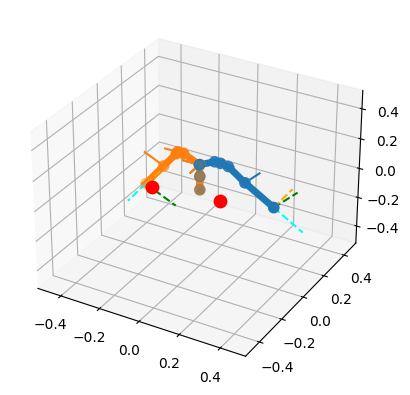

t0 tensor([ 0.1602, -0.0933,  0.0895]) and t1 tensor([-0.1389, -0.1677,  0.0767])


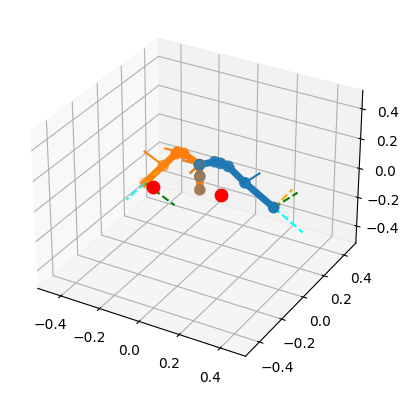

t0 tensor([ 0.1612, -0.0671,  0.1142]) and t1 tensor([-0.1404, -0.1581,  0.0693])


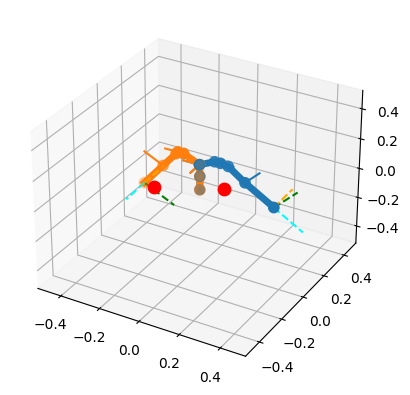

t0 tensor([ 0.1668, -0.0527,  0.1173]) and t1 tensor([-0.1409, -0.1563,  0.0674])


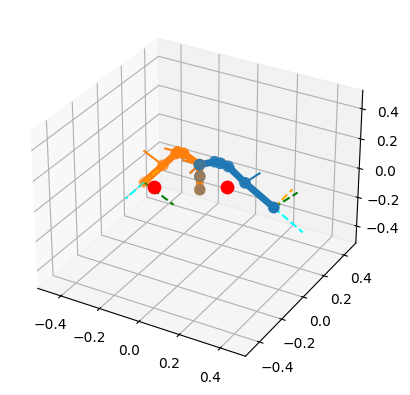

t0 tensor([ 0.1659, -0.0473,  0.1150]) and t1 tensor([-0.1412, -0.1544,  0.0668])


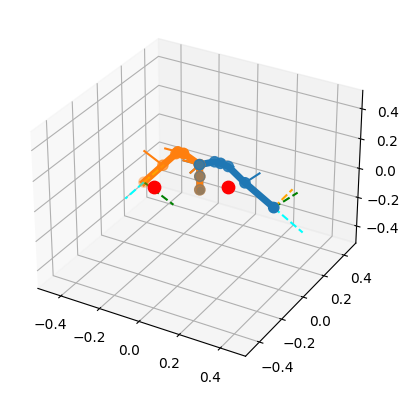

t0 tensor([ 0.1715, -0.0329,  0.1181]) and t1 tensor([-0.1417, -0.1526,  0.0650])


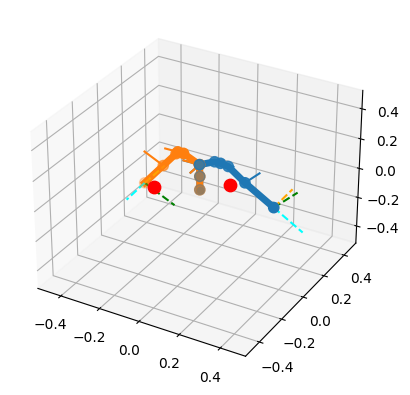

t0 tensor([ 0.1707, -0.0274,  0.1158]) and t1 tensor([-0.1420, -0.1507,  0.0644])


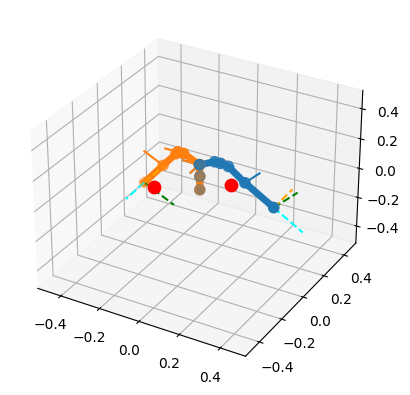

t0 tensor([ 0.1763, -0.0130,  0.1189]) and t1 tensor([-0.1425, -0.1489,  0.0626])


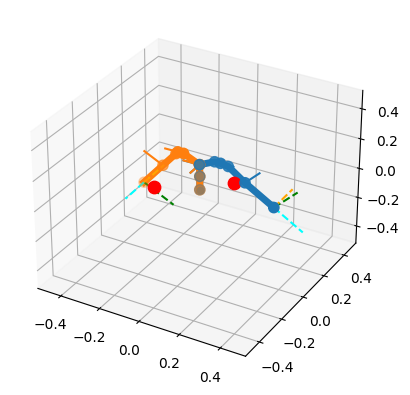

t0 tensor([ 0.1754, -0.0075,  0.1166]) and t1 tensor([-0.1428, -0.1470,  0.0620])


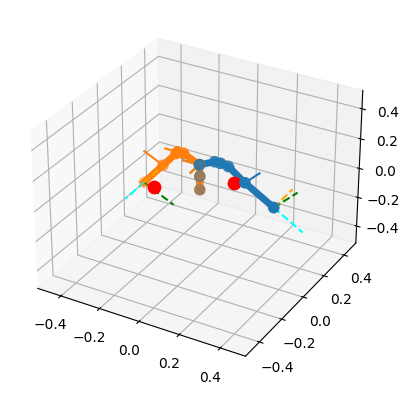

t0 tensor([0.1813, 0.0044, 0.1234]) and t1 tensor([-0.1289, -0.1553,  0.0461])


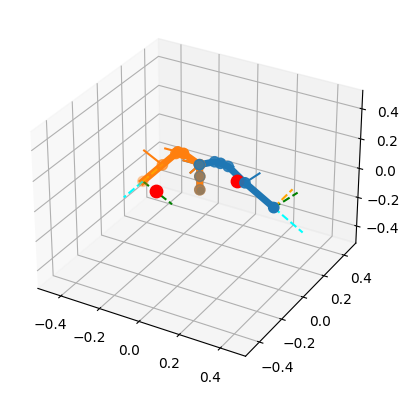

t0 tensor([ 0.1828, -0.0014,  0.1289]) and t1 tensor([-0.1313, -0.1517,  0.0170])


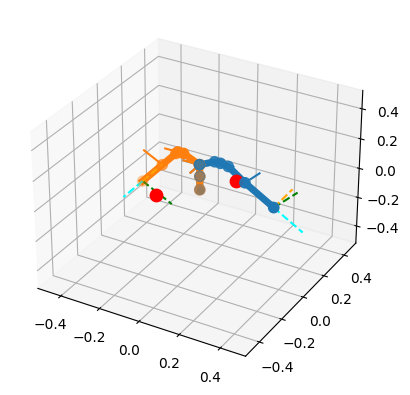

t0 tensor([0.1904, 0.0010, 0.1400]) and t1 tensor([-0.1330, -0.1468, -0.0115])


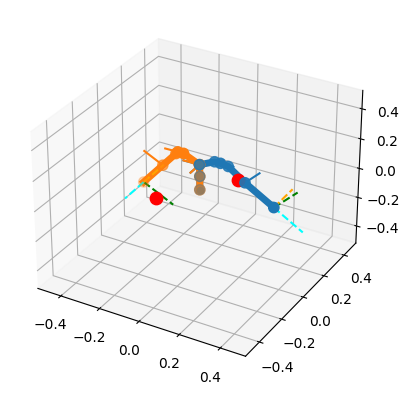

t0 tensor([0.1900, 0.0049, 0.1393]) and t1 tensor([-0.1247, -0.1514, -0.0161])


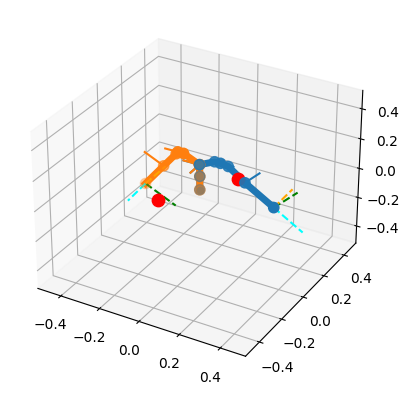

t0 tensor([0.1967, 0.0130, 0.1452]) and t1 tensor([-0.1246, -0.1525, -0.0164])


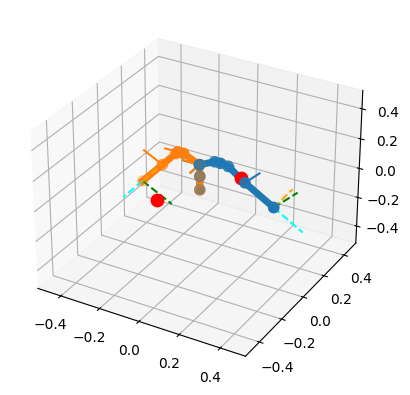

t0 tensor([ 0.1884, -0.0042,  0.1302]) and t1 tensor([-0.1244, -0.1542, -0.0120])


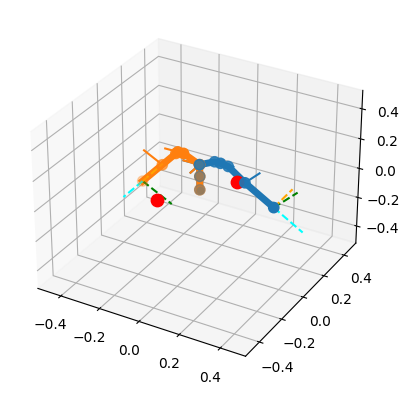

t0 tensor([ 0.1951, -0.0035,  0.1024]) and t1 tensor([-0.1233, -0.1599, -0.0064])


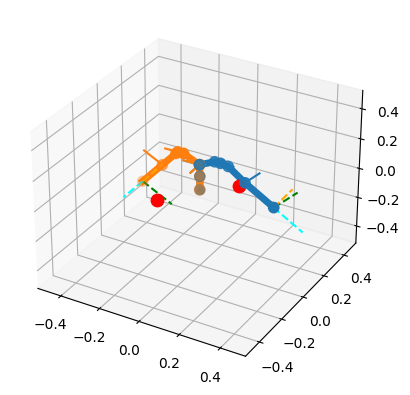

t0 tensor([ 0.1964, -0.0110,  0.0682]) and t1 tensor([-0.1219, -0.1660,  0.0009])


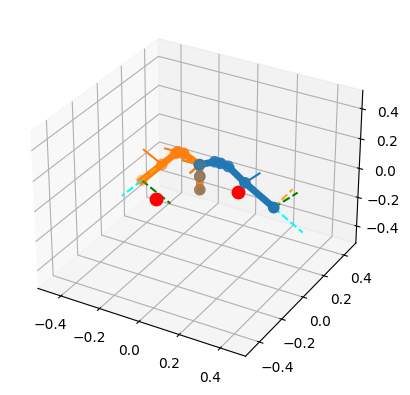

t0 tensor([ 0.2009, -0.0228,  0.0467]) and t1 tensor([-0.1210, -0.1737,  0.0066])


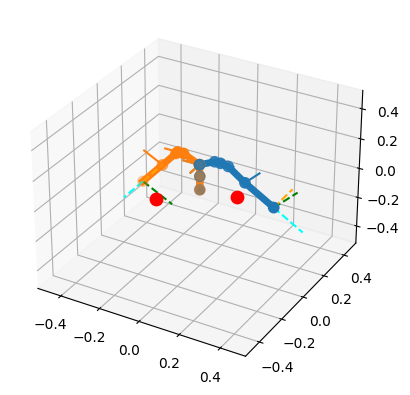

t0 tensor([ 0.1945, -0.0317,  0.0411]) and t1 tensor([-0.1207, -0.1737,  0.0078])


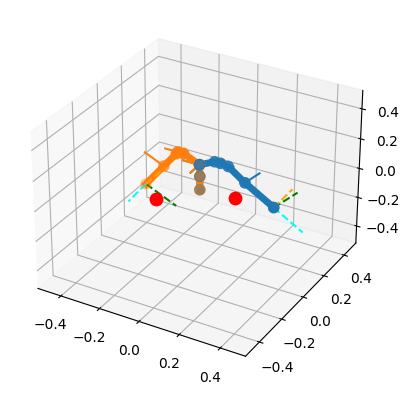

In [8]:
#del model # remove to demonstrate saving and loading

model = SAC.load("sac_imitation")

print(f"len targets {len(env.targets)}")
print(f"targets {env.targets}")

for t in env.targets:
    action, _states = model.predict(np.array(t.flatten()).reshape(1,-1))
    obs, rewards, dones, info = env.step(action.flatten())

    # display the arms and target
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # set the limit for all axes to be between -1 and 1
    ax.set_xlim([-0.5, 0.5])
    ax.set_ylim([-0.5, 0.5])
    ax.set_zlim([-0.5, 0.5])

    # assuming poppy.l_arm_chain and poppy.r_arm_chain are defined somewhere else in the code
    ax.scatter([0], [0],[0])
    print(f"t0 {t[0]} and t1 {t[1]}")
    env.poppy.l_arm_chain.plot(env.poppy.l_arm_chain.convert_to_ik_angles(env.poppy.l_arm_chain.joints_position), ax, target = tuple(t[0].numpy()))
    env.poppy.r_arm_chain.plot(env.poppy.r_arm_chain.convert_to_ik_angles(env.poppy.r_arm_chain.joints_position), ax, target = tuple(t[1].numpy()))

    plt.show()  # Blocking call
    time.sleep(3)

In [10]:
model = SAC.load("sac_imitation")

obs = env.reset()
k =0
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    k  += 5
    
    if k >= 286 :
        break
        obs = env.reset()
        k = 0

In [ ]:
C:\Users\Moez\Desktop\MSIA\poppy-torso-track\imitation_ddpg.ipynb